**L056_decision_tree.ipynb**

2024 JUN 02

Tershire

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# model

In [2]:
classifier = DecisionTreeClassifier(random_state=156)

# data

In [3]:
iris_dataset = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.2, random_state=11)

# training

In [4]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

## analysis

In [5]:
from sklearn.tree import export_graphviz
import graphviz

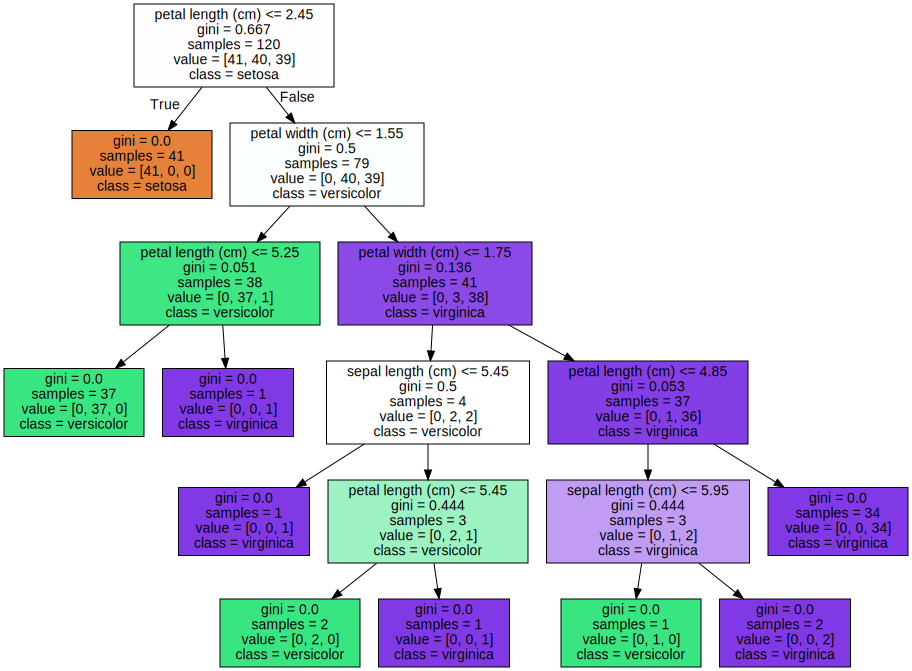

In [6]:
export_graphviz(classifier, out_file="iris_tree.dot", class_names=iris_dataset.target_names,
               feature_names=iris_dataset.feature_names, impurity=True, filled=True)

with open("iris_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## feature importance

⚠️ the nuance of "importance"

In [7]:
import numpy as np
import seaborn as sns

In [8]:
print(f"feature importances:\n{np.round(classifier.feature_importances_, 3)}\n")

for feature_name, importance in zip(iris_dataset.feature_names, classifier.feature_importances_):
    print(f"{feature_name}: {importance:.3F}")

feature importances:
[0.025 0.    0.555 0.42 ]

sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<Axes: >

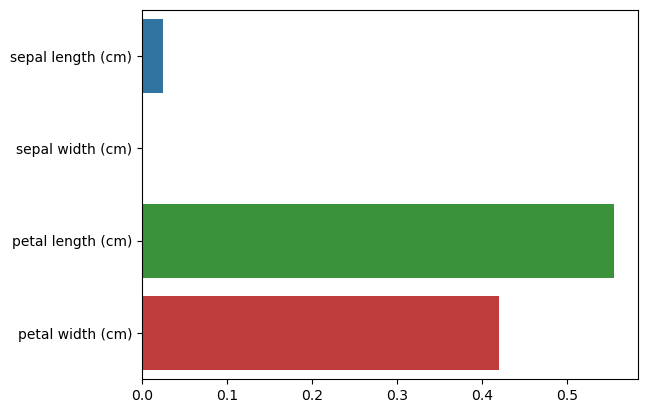

In [9]:
sns.barplot(x=classifier.feature_importances_, y=iris_dataset.feature_names)

# overfitting demonstration

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

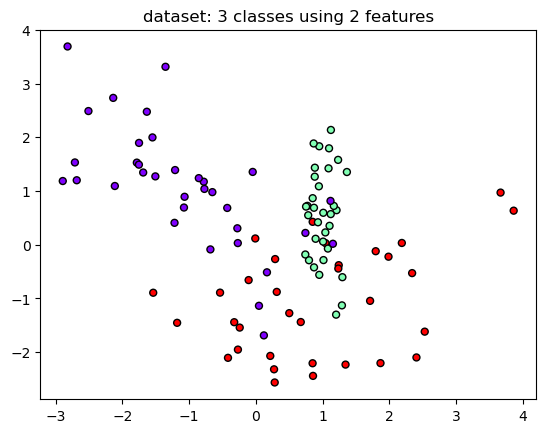

In [11]:
plt.title("dataset: 3 classes using 2 features")

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, cmap="rainbow", edgecolor='k')

In [16]:
def visualize_boundaries(model, X, Y):
    fig, ax = plt.subplots()

    # training data
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=25, cmap="rainbow", edgecolor='k',
              clim=(Y.min(), Y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim_ini, xlim_fin = ax.get_xlim()
    ylim_ini, ylim_fin = ax.get_ylim()

    # predict over meshgrid data
    X_mesh, Y_mesh = np.meshgrid(np.linspace(xlim_ini, xlim_fin, num=200), 
                                 np.linspace(ylim_ini, ylim_fin, num=200))
    Y_mesh_pred = model.predict(np.c_[X_mesh.ravel(), Y_mesh.ravel()]).reshape(X_mesh.shape)

    # boundaries
    num_classes = len(np.unique(Y))
    boundaries = ax.contourf(X_mesh, Y_mesh, Y_mesh_pred,
                            alpha=0.3, levels=np.arange(num_classes + 1) - 0.5,
                            cmap="rainbow", clim=(Y.min(), Y.max()), zorder=1)

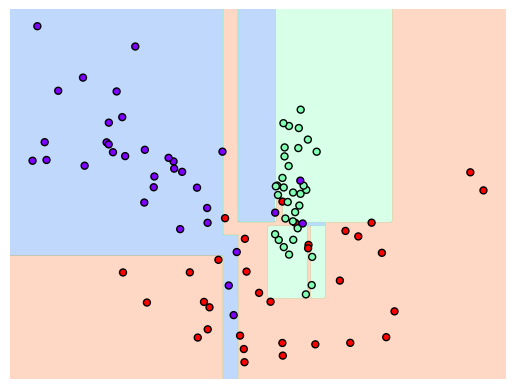

In [17]:
classifier = DecisionTreeClassifier(random_state=156)
classifier.fit(X, Y)

visualize_boundaries(classifier, X, Y)

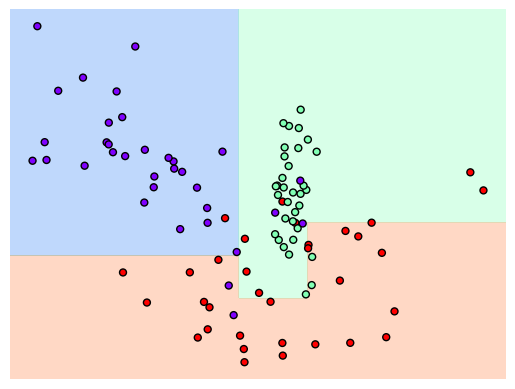

In [18]:
# hyperparameter tuning
classifier = DecisionTreeClassifier(random_state=156, min_samples_leaf=6)
classifier.fit(X, Y)

visualize_boundaries(classifier, X, Y)